In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings 
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [3]:
df = pd.read_csv('data/loan_data.csv')

In [4]:
df.shape

(614, 13)

In [5]:
df.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
505,LP002622,Male,Yes,2,Graduate,No,3510,4416.0,243.0,360.0,1.0,Rural,Y
244,LP001811,Male,Yes,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban,Y
273,LP001894,Male,Yes,0,Graduate,No,2620,2223.0,150.0,360.0,1.0,Semiurban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.duplicated().sum()

0

# EDA

#### Univariate analysis

#### Categorical columns - no_of_dependents, education, self_employed, property-area, loan-status

In [24]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y


In [25]:
# Countplot - to see the value counts
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [79]:
def count(data, x):
    type = input('What type, count or pie ?')
    type = type.lower()
    if type == 'count':
        
        if data[x].isnull().sum() != 0:
           print(f'{x} column has {data[x].isnull().sum()} null values')
        else:
            print(f'{x} column has no null values')
        print(f'in numbers - {data[x].value_counts()}, in % - {round((data[x].value_counts() / data.shape[0]) * 100, 2)}')
        sns.countplot(data = data, x = x, hue = x)
        plt.show()

    else:
        if data[x].isnull().sum() != 0:
           print(f'{x} column has {data[x].isnull().sum()} null values')
        else:
            print(f'{x} column has no null values')
        # print(f'in numbers - {data[x].value_counts()}, in % - {round((data[x].value_counts() / data.shape[0]) * 100, 2)}')
        data[x].value_counts().plot(kind = 'pie', autopct = '%.2f')
        plt.show()

What type, count or pie ? count


Loan_Status column has no null values
in numbers - Loan_Status
Y    422
N    192
Name: count, dtype: int64, in % - Loan_Status
Y    68.73
N    31.27
Name: count, dtype: float64


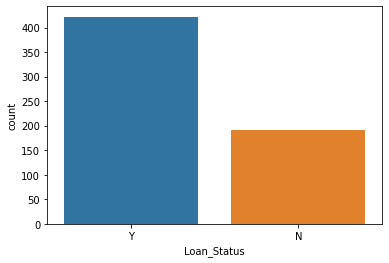

In [82]:
count(df, 'Loan_Status')

What type, count or pie ? count


Gender column has 13 null values
in numbers - Gender
Male      489
Female    112
Name: count, dtype: int64, in % - Gender
Male      79.64
Female    18.24
Name: count, dtype: float64


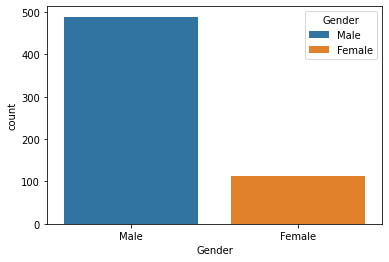

In [83]:
count(df, 'Gender')

What type, count or pie ? pie


Married column has 3 null values


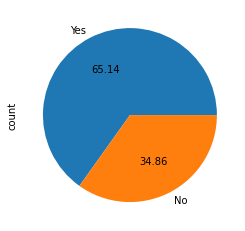

In [84]:
count(df, 'Married')

What type, count or pie ? count


Dependents column has 15 null values
in numbers - Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64, in % - Dependents
0     56.19
1     16.61
2     16.45
3+     8.31
Name: count, dtype: float64


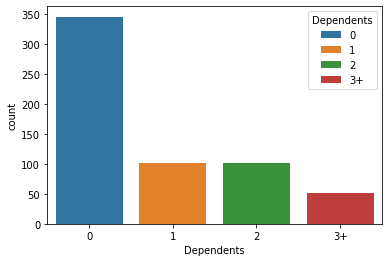

In [92]:
count(df, 'Dependents')

What type, count or pie ? count


Education column has no null values
in numbers - Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64, in % - Education
Graduate        78.18
Not Graduate    21.82
Name: count, dtype: float64


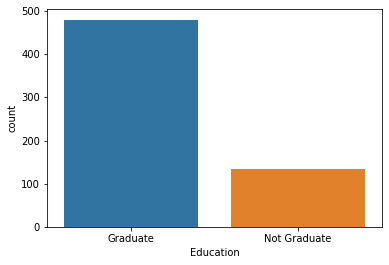

In [85]:
count(df, 'Education')

Self_Employed column has 32 null values
in numbers - Self_Employed
No     500
Yes     82
Name: count, dtype: int64, in % - Self_Employed
No     81.43
Yes    13.36
Name: count, dtype: float64


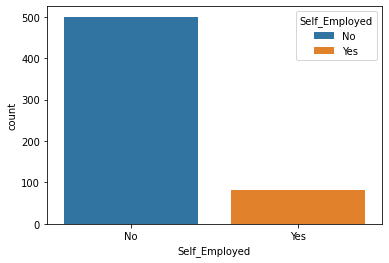

In [64]:
count(df, 'Self_Employed')

Credit_History column has 50 null values
in numbers - Credit_History
1.0    475
0.0     89
Name: count, dtype: int64, in % - Credit_History
1.0    77.36
0.0    14.50
Name: count, dtype: float64


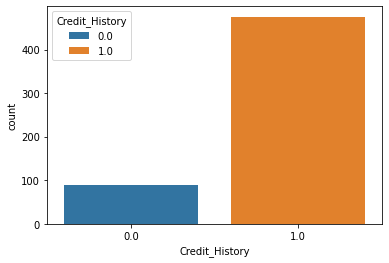

In [65]:
count(df, 'Credit_History')

Property_Area column has no null values
in numbers - Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64, in % - Property_Area
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: count, dtype: float64


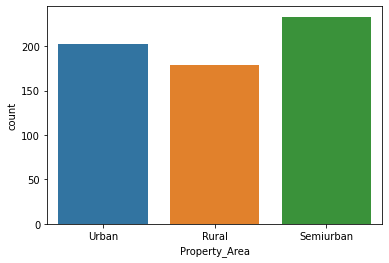

In [66]:
count(df, 'Property_Area')

#### Numerical data - ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term

In [86]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
244,LP001811,Male,Yes,0,Not Graduate,No,3406,4417.0,123.0,360.0,1.0,Semiurban,Y


In [132]:
def hist(data, x, bins=10):
    if data[x].isnull().sum() != 0:
       print(f'{x} column has {data[x].isnull().sum()} null values')
    else:
        print(f'{x} column has no null values')
    plt.hist(data[x], bins)
    plt.show()

ApplicantIncome column has no null values


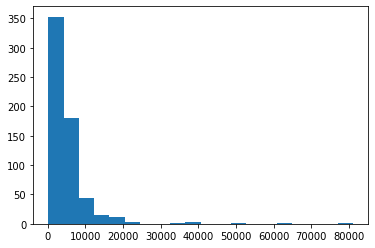

In [135]:
hist(df, 'ApplicantIncome', 20)

In [103]:
df[df['ApplicantIncome'] > 35000].shape[0]

6

CoapplicantIncome column has no null values


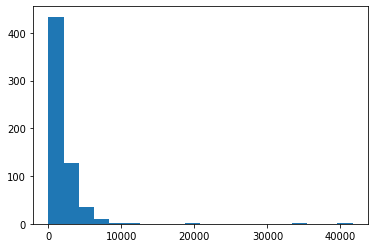

In [136]:
hist(df, 'CoapplicantIncome', 20)

In [108]:
df[df['CoapplicantIncome'] > 15000].shape[0]

4

format is value+k
LoanAmount column has 22 null values


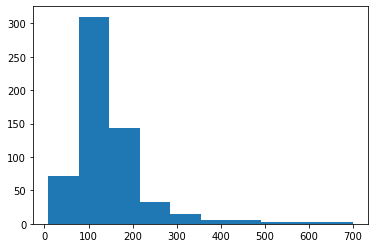

In [126]:
print('format is value+k')
hist(df, 'LoanAmount')

Loan_Amount_Term column has 14 null values


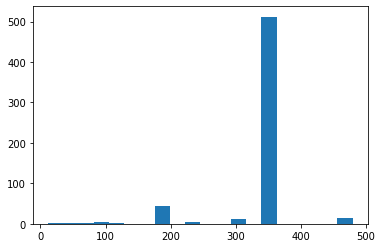

In [137]:
hist(df, 'Loan_Amount_Term', 20)

In [128]:
df[df['Loan_Amount_Term'] > 300].shape[0]

527

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

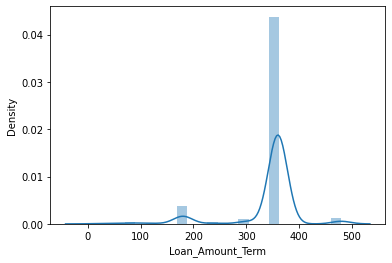

In [140]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

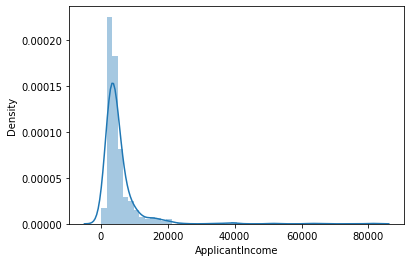

In [141]:
sns.distplot(df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

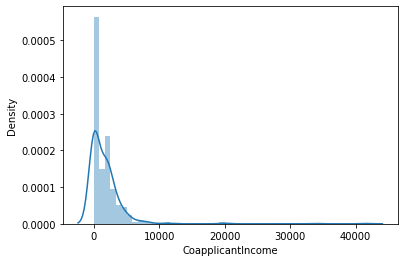

In [142]:
sns.distplot(df['CoapplicantIncome'])

<Axes: xlabel='LoanAmount', ylabel='Density'>

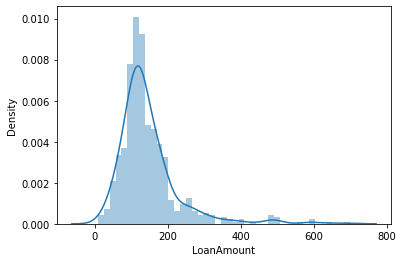

In [145]:
sns.distplot(df['LoanAmount'])

<Axes: xlabel='LoanAmount'>

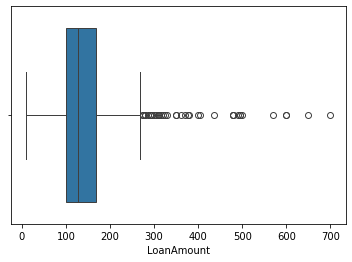

In [148]:
sns.boxplot(x = df['LoanAmount'])

<Axes: xlabel='ApplicantIncome'>

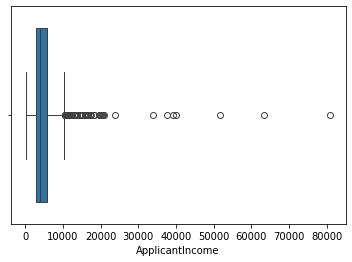

In [150]:
sns.boxplot(x = df['ApplicantIncome'])

<Axes: xlabel='CoapplicantIncome'>

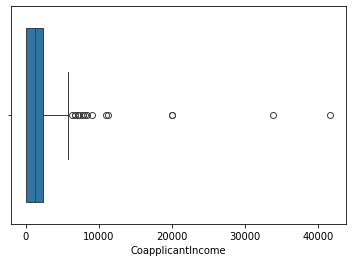

In [152]:
sns.boxplot(x = df['CoapplicantIncome'])

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df = df.drop(columns = 'Loan_ID')
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
X = df[['Married', 'Gender', 'Self_Employed', 'Education','LoanAmount', 'Credit_History']]
y = df['Loan_Status']

X = X.fillna(method = 'ffill')
y = y.fillna(method = 'ffill')

In [12]:
X.Married.value_counts()

Married
Yes    400
No     214
Name: count, dtype: int64

In [13]:
X['Married'] = X['Married'].map({'Yes' : 1, 'No' : 0})

In [14]:
X['Gender'] = X['Gender'].map({'Male' : 0, 'Female' : 1})
X['Self_Employed'] = X['Self_Employed'].map({'No' : 0, 'Yes' : 1})
X['Education'] = X['Education'].map({'Not Graduate' : 0, 'Graduate' : 1})

In [15]:
X = X.iloc[1:, :]

In [16]:
y = y.iloc[1:]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [18]:
# # Define the column transformer
# ct1 = ColumnTransformer(
#     transformers=[
#         ('Gender', SimpleImputer(strategy='most_frequent'),[1]),
#         ('Married', SimpleImputer(strategy='most_frequent'), [0]),
#         ('Self_Employed', SimpleImputer(strategy='most_frequent'), [2]),
#         ('LoanAmount', SimpleImputer(strategy='mean'), [4]),
#         ('Credit_History', SimpleImputer(strategy='most_frequent'), [4]),
#     ]  # Drop other columns not specified in transformers
# )

# ct2 = ColumnTransformer(
#     transformers=[
#         ('Married', OneHotEncoder(), [0]), 
#         ('Education', OneHotEncoder(), [3]),
#         ('Self_Employed', OneHotEncoder(), [2])
#     ]
# )

# #4th Feature selection
# ct3 = SelectKBest(score_func=chi2,k=8)

# ct4 = DecisionTreeClassifier()

In [19]:
# pipe = Pipeline([
#     ('ct1', ct1),
#     ('ct2', ct2),
#     ('ct3', ct3),
#     ('ct4', ct4)
# ])

In [20]:
# # Display Pipeline
# from sklearn import set_config
# set_config(display='diagram')
# #fit data
# pipe.fit(X_train, y_train)

In [21]:
from sklearn.svm import SVC  
clf = SVC(kernel='linear') 

In [22]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [23]:
clf.score(X_test,y_test)

0.8292682926829268

In [24]:
X.columns

Index(['Married', 'Gender', 'Self_Employed', 'Education', 'LoanAmount',
       'Credit_History'],
      dtype='object')

In [25]:
a = np.array([[1, 0, 1, 1, 592, 1]]).reshape(1, -1)
clf.predict(a)

array(['Y'], dtype=object)

In [118]:
import joblib
joblib.dump(dt1, 'dt.joblib')

['dt.joblib']

In [119]:
d = joblib.load('dt.joblib')

In [27]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("svm-clf.pkl","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()

In [30]:
a = np.array([[1, 0, 1, 1, 592, 1]]).reshape(1, -1)
dt1.predict(a)

array(['Y'], dtype=object)